In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)


Mounted at /content/drive


In [2]:
cd ..

/


In [3]:
!cp '/content/drive/MyDrive/m30000.zip' content
!cp '/content/drive/MyDrive/saved_model.zip' content

In [4]:
 cd content

/content


In [5]:
!unzip m30000.zip -d m30000
!unzip saved_model.zip -d saved_model

Streaming output truncated to the last 5000 lines.
  inflating: m30000/m30000/Wheat Loose Smut/81986785-37c7-4ed4-b4ef-14e904e7cc28.jpg  
  inflating: m30000/m30000/Wheat Loose Smut/8217d704-f47d-4551-962c-c1e2f409116b.jpg  
  inflating: m30000/m30000/Wheat Loose Smut/8229fb99-69aa-40ae-b80e-061aabab6de2.jpg  
  inflating: m30000/m30000/Wheat Loose Smut/824a6212-c85f-4904-a815-90a29d42a3b2.jpg  
  inflating: m30000/m30000/Wheat Loose Smut/828dde6c-5714-4db9-a302-ce8d08288298.jpg  
  inflating: m30000/m30000/Wheat Loose Smut/8291b557-c843-4d0f-a65c-05393dda8272.jpg  
  inflating: m30000/m30000/Wheat Loose Smut/829bb264-ed6d-4e65-98e9-b636c9dbd9d6.jpg  
  inflating: m30000/m30000/Wheat Loose Smut/829f7434-6cee-45e6-9d93-43406f582b69.jpg  
  inflating: m30000/m30000/Wheat Loose Smut/83192922-978b-4167-a672-12a67e447cce.jpg  
  inflating: m30000/m30000/Wheat Loose Smut/833229f4-a0c1-484d-bfc1-c4732a292829.jpg  
  inflating: m30000/m30000/Wheat Loose Smut/833d17c0-0469-4cfc-865f-cda207f1387

In [6]:
cd m30000

/content/m30000


In [7]:
ls

m30000/


In [8]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def load_images_and_labels(directory, num_images_per_class=200):
    class_names = os.listdir(directory)
    images = []
    labels = []

    for class_name in class_names:
        class_dir = os.path.join(directory, class_name)
        class_files = os.listdir(class_dir)
        class_labels = [class_name] * len(class_files)

        # Limit the number of images to load per class
        num_images = len(class_files)

        for i in range(num_images):
            file = class_files[i]
            file_path = os.path.join(class_dir, file)
            image = load_img(file_path, target_size=(256, 256))  # Adjust target size
            image_array = img_to_array(image)
            # image_array = tf.expand_dims(image_array, 0)
            images.append(image_array)
            labels.append(class_name)

    images = np.array(images)
    labels = np.array(labels)
    return images, labels

# Directory containing subdirectories of classes
main_directory = "m30000"

# Load images and labels
X_train, y_train = load_images_and_labels(main_directory)

# Print the shapes of the loaded data
print("Images Shape:", X_train.shape)
print("Labels Shape:", y_train.shape)



Images Shape: (24649, 256, 256, 3)
Labels Shape: (24649,)


In [9]:
x_len=len(X_train)

it=x_len%32
x_len=x_len-it
x_len

24640

In [10]:

X_train=X_train[:x_len,:,:,:]
y_train=y_train[:x_len]

In [11]:
X_train.shape

(24640, 256, 256, 3)

In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model

In [14]:
cd ..

/content


In [15]:
densenet_model = load_model('saved_model/dense.h5')
squeeze_model = load_model('saved_model/m_model_squeeze.h5')
mobilenet_model = load_model('saved_model/mobilenetv2.h5')
xception_model = load_model('saved_model/xecption.h5')
vggmax_model = load_model('saved_model/vggmax.h5')

In [16]:
tf.keras.backend.clear_session()
import gc
gc.collect()

1217

In [18]:
model_list=[densenet_model, squeeze_model, mobilenet_model, xception_model,vggmax_model]

In [19]:
def get_stacked_predictions(model, X):
    batch_size = 32

    num_batches = len(X) // batch_size

    # Initialize lists to store predictions
    predictions_list = []

    for i in range(num_batches):
        start_idx = i * batch_size
        end_idx = (i + 1) * batch_size

        # Extract a batch of images and labels
        batch_images = X[start_idx:end_idx]


        batch_predictions = np.array([model.predict(batch_images)])

        # Append the batch predictions to the predictions list
        predictions_list.append(batch_predictions)

    # Combine the predictions from different batches horizontally
    stacked_prediction = np.vstack(predictions_list)
    # stacked_prediction = stacked_prediction.reshape(-1, 2)
    return stacked_prediction


In [20]:

tf.keras.backend.clear_session()

X_train_densenet_pred = get_stacked_predictions(densenet_model, X_train)
tf.keras.backend.clear_session()
import gc
gc.collect()

X_train_squeezenet_pred = get_stacked_predictions(squeeze_model, X_train)
tf.keras.backend.clear_session()
import gc
gc.collect()

X_train_mobilenetv2_pred = get_stacked_predictions(mobilenet_model, X_train)
tf.keras.backend.clear_session()
import gc
gc.collect()

X_train_xception_pred = get_stacked_predictions(xception_model, X_train)
tf.keras.backend.clear_session()
import gc
gc.collect()

X_train_vggmax_pred = get_stacked_predictions(vggmax_model, X_train)
tf.keras.backend.clear_session()
import gc
gc.collect()

tf.keras.backend.clear_session()

1/1 [==============================] - 0s 34ms/step


In [21]:
X_train_densenet_pred.shape

(770, 32, 8)

In [22]:

X_train_densenet_pred = X_train_densenet_pred.reshape(-1, 8)

# Flatten X_train_squeezenet_pred
X_train_squeezenet_pred = X_train_squeezenet_pred.reshape(-1, 8)

# Flatten X_train_mobilenetv2_pred
X_train_mobilenetv2_pred = X_train_mobilenetv2_pred.reshape(-1, 8)

# Flatten X_train_xception_pred
X_train_xception_pred = X_train_xception_pred.reshape(-1, 8)

X_train_vggmax_pred = X_train_vggmax_pred.reshape(-1, 8)


In [23]:
X_train_vggmax_pred.shape

(24640, 8)

In [24]:
y_train.shape

(24640,)

In [25]:
label_mapping = {
    'Black chaff': 0,
    'Brown rust': 1,
    'Crown and Root Rot': 2,
    'Healthy Wheat': 3,
    'Leaf Rust': 4,
    'Powdery mildew': 5,
    'Wheat Loose Smut': 6,
    'Yellow rust': 7
}
y_train= np.array([label_mapping[label] for label in y_train])
y_train = y_train.astype(int)

In [28]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.metrics import accuracy_score

# Assuming you have the individual model predictions stored in variables like:
# X_train_cnn_pred, X_train_vgg19_pred, X_train_densenet_pred, X_train_resnet_pred, X_train_senet_pred

# Stacking the individual model predictions horizontally
stacked_predictions = np.hstack((X_train_densenet_pred, X_train_squeezenet_pred, X_train_mobilenetv2_pred,
                                  X_train_xception_pred,X_train_vggmax_pred))



In [29]:
stacked_predictions.shape

(24640, 40)

In [30]:
from tensorflow.keras.utils import to_categorical


# Split the data into train and test sets
X_train_stacked, X_test_stacked, y_train_stacked, y_test_stacked = train_test_split(
    stacked_predictions, y_train, test_size=0.3, random_state=42)

y_train_stacked_encoded = to_categorical(y_train_stacked, num_classes=8)
y_test_stacked_encoded = to_categorical(y_test_stacked, num_classes=8)


In [31]:
# Define the architecture of the final neural network
final_estimator = Sequential([
    Dense(512, activation='relu', input_shape=(stacked_predictions.shape[1],)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(8, activation='sigmoid')  # Binary classification, so using sigmoid activation
])


In [32]:

# Compile the final model
final_estimator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [33]:
# Assuming 'encoded_labels' is a NumPy array containing one-hot encoded labels
i=10
for label in y_train_stacked_encoded:
    if(i==0):
      break
    i=i-1
    print(label)


[1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 1. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0.]


In [34]:
# Assuming 'encoded_labels' is a NumPy array containing one-hot encoded labels
i=10
for label in y_train_stacked:
    if(i==0):
      break
    i=i-1
    print(label)


0
2
7
6
4
0
6
2
1
0


In [35]:
history = final_estimator.fit(X_train_stacked, y_train_stacked_encoded, epochs=251, batch_size=32, validation_split=0.3)

Epoch 1/251
378/378 [==============================] - 4s 4ms/step - loss: 0.0551 - accuracy: 0.9453 - val_loss: 0.0227 - val_accuracy: 0.9805
Epoch 2/251
378/378 [==============================] - 1s 4ms/step - loss: 0.0206 - accuracy: 0.9800 - val_loss: 0.0211 - val_accuracy: 0.9813
Epoch 3/251
378/378 [==============================] - 1s 4ms/step - loss: 0.0191 - accuracy: 0.9814 - val_loss: 0.0209 - val_accuracy: 0.9809
Epoch 4/251
378/378 [==============================] - 1s 4ms/step - loss: 0.0186 - accuracy: 0.9813 - val_loss: 0.0217 - val_accuracy: 0.9799
Epoch 5/251
378/378 [==============================] - 1s 4ms/step - loss: 0.0174 - accuracy: 0.9814 - val_loss: 0.0208 - val_accuracy: 0.9807
Epoch 6/251
378/378 [==============================] - 1s 4ms/step - loss: 0.0165 - accuracy: 0.9823 - val_loss: 0.0212 - val_accuracy: 0.9799
Epoch 7/251
378/378 [==============================] - 1s 4ms/step - loss: 0.0155 - accuracy: 0.9822 - val_loss: 0.0227 - val_accuracy: 0.9793

In [36]:
# Save the final estimator model
final_estimator.save('final_estimator_model.h5')

In [37]:
pwd

'/content'

In [39]:
tf.keras.backend.clear_session()
import gc
gc.collect()

1919

In [44]:
cd m30000

/content/m30000


In [45]:
import tensorflow as tf

directory="m30000"
dataset=tf.keras.utils.image_dataset_from_directory(
    directory,
    shuffle= True,
    batch_size=32,
    image_size=(256, 256),

)

Found 24593 files belonging to 8 classes.


In [46]:
class_names=dataset.class_names
class_names

['Black chaff',
 'Brown rust',
 'Crown and Root Rot',
 'Healthy Wheat',
 'Leaf Rust',
 'Powdery mildew',
 'Wheat Loose Smut',
 'Yellow rust']

In [48]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Evaluate the model on the test data
y_pred = final_estimator.predict(X_test_stacked)

# Convert predicted probabilities to class labels (choose the class with the highest probability)
y_pred_labels = np.argmax(y_pred, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test_stacked, y_pred_labels)
print(f'Accuracy: {accuracy:.4f}')


231/231 [==============================] - 0s 1ms/step
Accuracy: 0.9777


In [50]:
y_pred_labels

array([5, 4, 2, ..., 4, 7, 3])

In [52]:
y_test_stacked

array([5, 4, 2, ..., 4, 7, 3])

In [55]:

# Generate a classification report with precision, recall, F1-score for each class
report = classification_report(y_test_stacked, y_pred_labels, target_names=class_names)
print('Classification Report:')
print(report)


Classification Report:
                    precision    recall  f1-score   support

       Black chaff       0.99      0.99      0.99      1095
        Brown rust       0.99      0.99      0.99       879
Crown and Root Rot       0.97      0.97      0.97       847
     Healthy Wheat       0.96      0.96      0.96       876
         Leaf Rust       0.96      0.95      0.95       949
    Powdery mildew       0.99      1.00      0.99      1012
  Wheat Loose Smut       0.96      0.96      0.96       687
       Yellow rust       0.99      0.99      0.99      1047

          accuracy                           0.98      7392
         macro avg       0.98      0.98      0.98      7392
      weighted avg       0.98      0.98      0.98      7392



In [56]:

# Calculate and display the confusion matrix
confusion = confusion_matrix(y_test_stacked, y_pred_labels)
print('Confusion Matrix:')
print(confusion)




Confusion Matrix:
[[1088    0    0    0    3    1    1    2]
 [   0  869    0    1    4    1    2    2]
 [   1    0  823   11    7    2    3    0]
 [   1    0    8  838   14    2   11    2]
 [   4    5    5   10  905    6   11    3]
 [   1    0    0    0    4 1007    0    0]
 [   1    1    9    9    8    2  657    0]
 [   2    2    0    0    2    1    0 1040]]


In [57]:
# Calculate precision, recall, and F1-score for each class
precision = precision_score(y_test_stacked, y_pred_labels, average=None)
recall = recall_score(y_test_stacked, y_pred_labels, average=None)
f1 = f1_score(y_test_stacked, y_pred_labels, average=None)


In [59]:

# Print precision, recall, and F1-score for each class
for i, class_name in enumerate(class_names):
    print(f'Class: {class_name}')
    print(f'Precision: {precision[i]:.4f}')
    print(f'Recall: {recall[i]:.4f}')
    print(f'F1-Score: {f1[i]:.4f}')
    print('')

Class: Black chaff
Precision: 0.9909
Recall: 0.9936
F1-Score: 0.9922

Class: Brown rust
Precision: 0.9909
Recall: 0.9886
F1-Score: 0.9897

Class: Crown and Root Rot
Precision: 0.9740
Recall: 0.9717
F1-Score: 0.9728

Class: Healthy Wheat
Precision: 0.9643
Recall: 0.9566
F1-Score: 0.9605

Class: Leaf Rust
Precision: 0.9556
Recall: 0.9536
F1-Score: 0.9546

Class: Powdery mildew
Precision: 0.9853
Recall: 0.9951
F1-Score: 0.9902

Class: Wheat Loose Smut
Precision: 0.9591
Recall: 0.9563
F1-Score: 0.9577

Class: Yellow rust
Precision: 0.9914
Recall: 0.9933
F1-Score: 0.9924



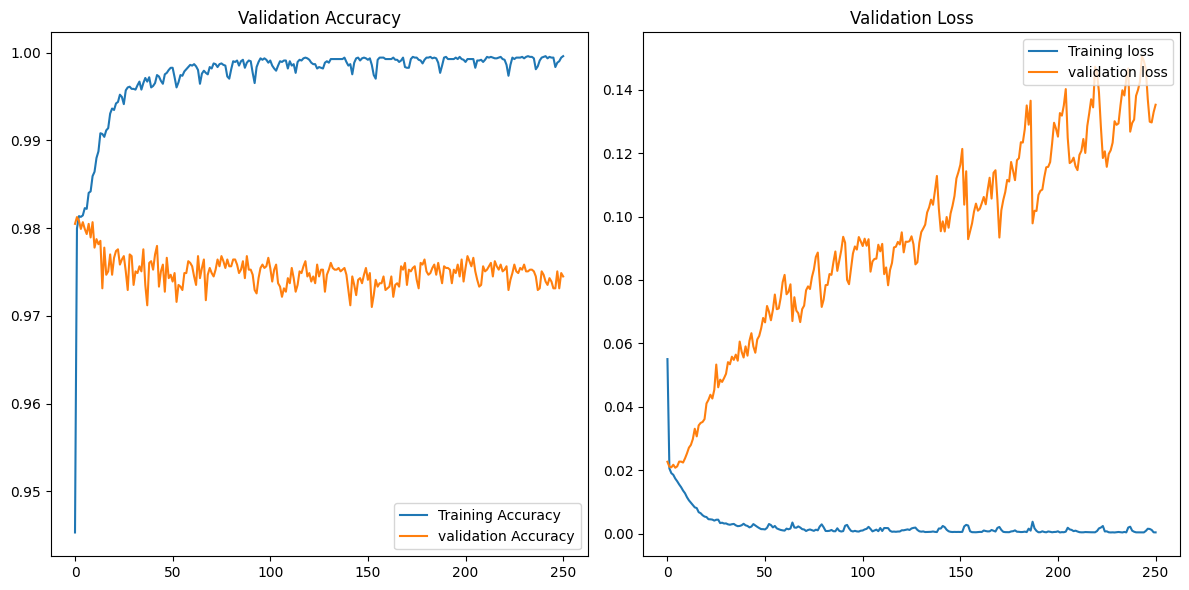

In [60]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
import matplotlib.pyplot as plt
import math


EPOCHS=251
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training')

plt.subplot(1,2,1)
plt.plot(range(EPOCHS),val_acc,label='validation Accuracy')
plt.legend(loc='lower right')
plt.title('Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training loss')
plt.legend(loc='upper right')
plt.title('Training Loss')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),val_loss,label='validation loss')
plt.legend(loc='upper right')
plt.title('Validation Loss')



plt.tight_layout()
plt.show()




In [65]:
from sklearn.metrics import precision_score, f1_score, confusion_matrix


# Calculate precision and F1-score
precision = precision_score(y_test_stacked, y_pred_labels, average='weighted')
f1 = f1_score(y_test_stacked, y_pred_labels, average='weighted')

print("Precision:", precision)
print("F1-Score:", f1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_stacked, y_pred_labels)
print("Confusion Matrix:")
print(conf_matrix)


Precision: 0.977638091493751
F1-Score: 0.9776521861816524
Confusion Matrix:
[[1088    0    0    0    3    1    1    2]
 [   0  869    0    1    4    1    2    2]
 [   1    0  823   11    7    2    3    0]
 [   1    0    8  838   14    2   11    2]
 [   4    5    5   10  905    6   11    3]
 [   1    0    0    0    4 1007    0    0]
 [   1    1    9    9    8    2  657    0]
 [   2    2    0    0    2    1    0 1040]]


231/231 [==============================] - 0s 1ms/step


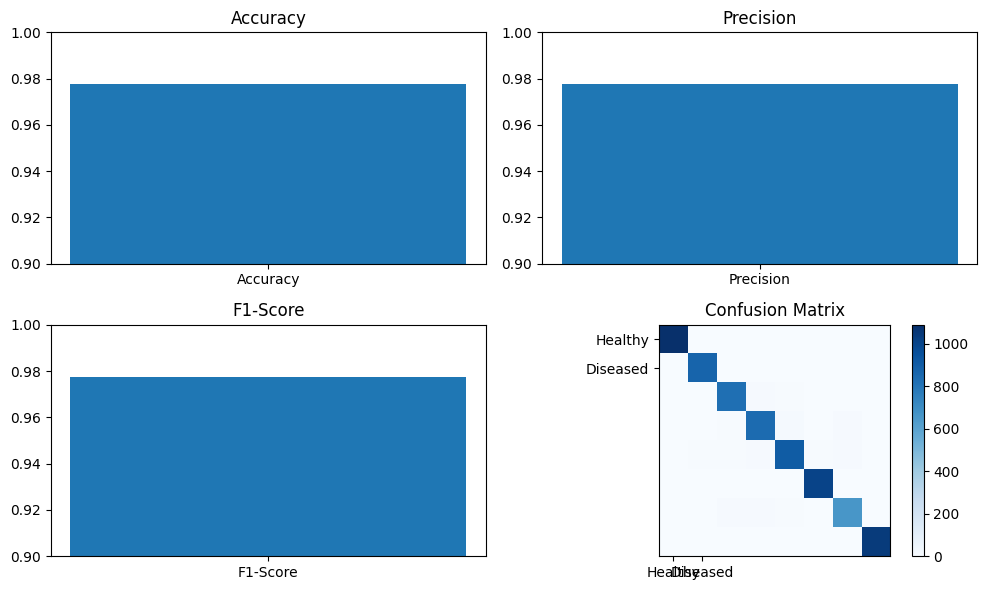

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix

# Predictions using the meta-model
y_pred_prob = final_estimator.predict(X_test_stacked)
y_pred_binary = (y_pred_prob >= 0.5).astype(int)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_stacked, y_pred_labels)
precision = precision_score(y_test_stacked, y_pred_labels, average='weighted')
f1 = f1_score(y_test_stacked, y_pred_labels, average='weighted')
conf_matrix = confusion_matrix(y_test_stacked, y_pred_labels)

# Plot the metrics
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.bar(['Accuracy'], [accuracy])
plt.ylim(0.9, 1.0)
plt.title('Accuracy')

plt.subplot(2, 2, 2)
plt.bar(['Precision'], [precision])
plt.ylim(0.9, 1.0)
plt.title('Precision')

plt.subplot(2, 2, 3)
plt.bar(['F1-Score'], [f1])
plt.ylim(0.9, 1.0)
plt.title('F1-Score')

plt.subplot(2, 2, 4)
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Healthy', 'Diseased'])
plt.yticks([0, 1], ['Healthy', 'Diseased'])

plt.tight_layout()
plt.show()
